In [1]:
import pandas as pd
import sklearn.model_selection as modelSelection
import sklearn.pipeline as pipeline
import sklearn.preprocessing as preprocessing
import sklearn.linear_model as linear_model
import sklearn.metrics as metrics
from mlxtend.plotting import plot_confusion_matrix as plotmatrics
from mlxtend.plotting import plot_decision_regions
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

%matplotlib inline

C:\Users\z00351wf\AppData\Local\Continuum\anaconda3\envs\DIGSI_T\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_csv("creditcardfraud\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.Class.value_counts()/len(df)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [4]:
X = df.loc[:,"V1":"V28"]
X = pd.get_dummies(X,drop_first=True)

In [5]:
Y = df["Class"]

# Apply Grid Search for logistic regression model

### Hyperparameters

In [6]:
model_logistic_Regression =  pipeline.Pipeline([
    ("poly",preprocessing.PolynomialFeatures()),
    ("scaler",preprocessing.StandardScaler()),
    ("logisticRegression", linear_model.LogisticRegression())
])

In [9]:
parameters ={}
parameters['poly__degree'] = [1,2]
#parameters['logisticRegression__penalty'] = ['l1','l2']
parameters['logisticRegression__C'] = [0.01,0.1,0.25,0.5,0.75,1]

In [10]:
gridSearch = GridSearchCV(model_logistic_Regression, parameters, cv=5, verbose=0)

In [11]:
gridSearch.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__memory', 'estimator__steps', 'estimator__poly', 'estimator__scaler', 'estimator__logisticRegression', 'estimator__poly__degree', 'estimator__poly__include_bias', 'estimator__poly__interaction_only', 'estimator__scaler__copy', 'estimator__scaler__with_mean', 'estimator__scaler__with_std', 'estimator__logisticRegression__C', 'estimator__logisticRegression__class_weight', 'estimator__logisticRegression__dual', 'estimator__logisticRegression__fit_intercept', 'estimator__logisticRegression__intercept_scaling', 'estimator__logisticRegression__max_iter', 'estimator__logisticRegression__multi_class', 'estimator__logisticRegression__n_jobs', 'estimator__logisticRegression__penalty', 'estimator__logisticRegression__random_state', 'estimator__logisticRegression__solver', 'estimator__logisticRegression__tol', 'estimator__logisticRegression__verbose', 'estimator__logisticRegression__warm_start', 'estimator', 'fit_params', 'iid', 'n_jobs', 'param_grid', 'p

## Fit model

In [12]:
gridSearch.fit(X,Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticRegression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'poly__degree': [1, 2], 'logisticRegression__C': [0.01, 0.1, 0.25, 0.5, 0.75, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

## Best Hyperparameters

In [13]:
# View best hyperparameters
print('Best C:', gridSearch.best_estimator_.get_params()['logisticRegression__C'])
print('Best Penalty:', gridSearch.best_estimator_.get_params()['poly__degree'])


Best C: 0.01
Best Penalty: 2


In [14]:
y_pred = gridSearch.predict(X)

In [15]:
accuracy = metrics.accuracy_score(Y, y_pred)
print("Accurcy: %f,\nprecision: %f,\nrecall: %f, \nFscore: %f" 
      % (accuracy,
         metrics.precision_score(Y, y_pred),
         metrics.recall_score(Y, y_pred),
         metrics.f1_score(Y, y_pred)
        ))

Accurcy: 0.999526,
precision: 0.940741,
recall: 0.774390, 
Fscore: 0.849498


In [18]:
y_prob = gridSearch.predict_proba(X)[:,1]

In [19]:
fpr, tpr, thresholds = metrics.roc_curve(Y,y_prob)

Text(0,0.5,'TPR')

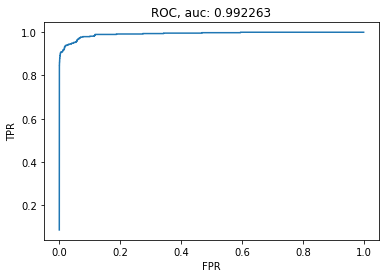

In [20]:
plt.plot(fpr, tpr)
auc = metrics.auc(fpr, tpr)
plt.title("ROC, auc: %f" % auc)
plt.xlabel("FPR")
plt.ylabel("TPR")